<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on SageMaker, Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [38]:
from tensorflow.keras.datasets import reuters
import numpy as np

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [39]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [40]:
len(word_index.values())

30979

In [41]:
X_train.shape

(8982,)

In [42]:
X_test.shape

(2246,)

In [43]:
y_train.shape

(8982,)

In [58]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values()) + 1
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(maxlen,)))
#model.add(LSTM(128, input_shape=(maxlen, len(word_index))))
model.add(Dense(1, activation='sigmoid'))

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [64]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/2
8982/8982 [==============================] - 45s 5ms/sample - loss: nan - accuracy: 0.0487 - val_loss: nan - val_accuracy: 0.0387
Epoch 2/2
8982/8982 [==============================] - 43s 5ms/sample - loss: nan - accuracy: 0.0477 - val_loss: nan - val_accuracy: 0.0387
2246/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

pad_sequence makes sure all the sequences have the same lenght.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LSTM is a type of RNN that has a special memory cell that holds long term dependancies. This is important because when training these long term dependancies increase accuracy for for sequential data by holding onto the memory for future recurence.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

3 use cases are : text data(like clasifying newspapers) because words have certain orders and the LSTM is able to pick up on these patterns. Another use case is a classification problem over that is layed out with a time label since the RNN is able to pick up on sequential patterns and almost predict the future. The 3rd case could be for generating text, similar to the first, once the patterns are recognized the model is able to predict on the things someone might say like we did with Shakespeare's work.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [48]:
!pip install google_images_download

  Using cached https://files.pythonhosted.org/packages/18/ed/0319d30c48f3653802da8e6dcfefcea6370157d10d566ef6807cceb5ec4d/google_images_download-2.8.0.tar.gz
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14554 sha256=bb03516d68567432d45856b226760b7bcb58058f91943c7d073fb6bd0d31d538
  Stored in directory: C:\Users\serga\AppData\Local\pip\Cache\wheels\1f\28\ad\f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [67]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: http://www.slrobertson.com/images/usa/georgia/atlanta/atl-botanical-gardens/frog-lily-pond-2-b.jpg
Completed Image ====> 1.frog-lily-pond-2-b.jpg
Image URL: https://cdn.pixabay.com/photo/2017/07/14/17/44/frog-2504507_960_720.jpg
Completed Image ====> 2.frog-2504507_960_720.jpg
Image URL: https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg
Completed Image ====> 3.Frog-on-lily-pad.jpg
Image URL: https://i.pinimg.com/originals/9a/49/08/9a49083d4d7458a194a451eea757a444.jpg
Completed Image ====> 4.9a49083d4d7458a194a451eea757a444.jpg
Image URL: https://s3.amazonaws.com/assets.cce.cornell.edu/slides/22531/image/sized/Ponds5.jpg?1437939118
Completed Image ====> 5.Ponds5.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [108]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if entry[1] == ['bullfrog', 'tree frog', 'tailed frog', 'frog']:
          return entry[2]
    return 0.0

In [105]:
img_contains_frog(process_img_path('./downloads/lilly frog pond/4.9a49083d4d7458a194a451eea757a444.jpg'))

[('n04476259', 'tray', 0.6419141), ('n03485794', 'handkerchief', 0.1880797), ('n01644373', 'tree_frog', 0.014359105)]


0.0

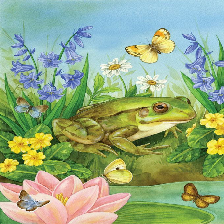

In [106]:
process_img_path('./downloads/lilly frog pond/4.9a49083d4d7458a194a451eea757a444.jpg')

In [109]:
img_path = './downloads/lilly frog pond/'

import os
#from PIL import Image


frog_images = []

for picture in os.listdir(img_path):
    if picture[-3:] == 'jpg':
        frog_image_test =  process_img_path(f'downloads/lilly frog pond/{picture}')
        frog_images.append(frog_image_test)


In [125]:
for frog_image in frog_images:
    print(img_contains_frog(frog_image))

[('n03991062', 'pot', 0.7243723), ('n01641577', 'bullfrog', 0.045519654), ('n01667778', 'terrapin', 0.04263503)]
0.0
[('n01641577', 'bullfrog', 0.35860363), ('n01644900', 'tailed_frog', 0.30636507), ('n01737021', 'water_snake', 0.15603667)]
0.0
[('n02190166', 'fly', 0.13405184), ('n07718472', 'cucumber', 0.11413105), ('n07716358', 'zucchini', 0.08889663)]
0.0
[('n04476259', 'tray', 0.6419141), ('n03485794', 'handkerchief', 0.1880797), ('n01644373', 'tree_frog', 0.014359105)]
0.0
[('n03991062', 'pot', 0.15060292), ('n12620546', 'hip', 0.09164842), ('n01773797', 'garden_spider', 0.06739501)]
0.0


#### Stretch Goal: Displaying Predictions

In [121]:
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

image_arrays = []

for frog_image in frog_images:
    image_array = np.array(frog_image)
    image_arrays.append(image_array)

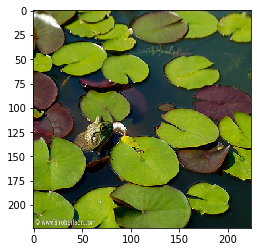

In [123]:
plt.imshow(image_arrays[0]);

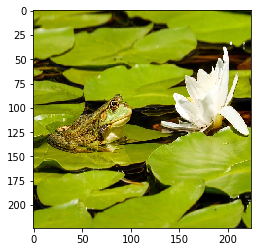

In [126]:
plt.imshow(image_arrays[1]);

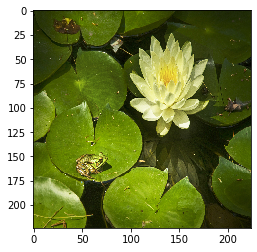

In [127]:
plt.imshow(image_arrays[2]);

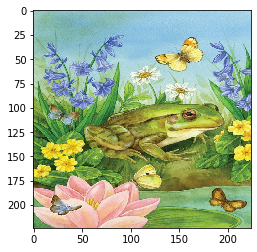

In [128]:
plt.imshow(image_arrays[3]);

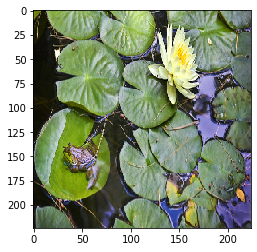

In [129]:
plt.imshow(image_arrays[4]);

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

## __*Your Answer:*__ 
Autoencoders are useful dimensionality reduction. They allow the information to be "compressed" by removing the noise(encoder). Then using the decoder the model is able to recreate the original input.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

## - What do you consider your strongest area, as a Data Scientist?
My strongest area relates to the practical applications of the models we have learned so far. How can I bring this technology to a business and increase their profits is something I always think about.
## - What area of Data Science would you most like to learn more about, and why?
I loved learning about regression and forrest models. I definetely think there is still a lot I can learn about neural networks. The are of Data Science I would like to learn more about is how to apply neural networks for business analytics. I want to figure out if it is feasible or worth exploring since from what I've learned neural networks take longer to train and return similar results to more efficient models.
## - Where do you think Data Science will be in 5 years?
I think Data Science will become very intrinsic in the way we see the world moving forward. I think that computers will continue to become faster and more powerful and competition being what it is will push companies to use this hardware for better profits. I feel Data Science is inevitable now that I understand how it works. Computer Engineers already shape how we operate, Data scientist will shape the decisions we make.
## - What are the threats posed by AI to our society?
AI posses the threat of making many jobs obsolete. The kinds of jobs that are repetitive and lend themselves to error will be replaced by AI that can do the same task with less error margins and even faster rate. I see AI as efficient since you can train it once and let the AI do the rest.
## - How do you think we can counteract those threats? 
I think the first step is definately awareness. People who work in these fields that will be replaced within the next 10-20 years should be aware that they need to possibly begin to diversify their skills or specialize in other areas of production where machines won't be able to replace them. Maybe we will see a growth in the funding of technical schools to allow them to teach people these kinds of jobs.
## - Do you think achieving General Artifical Intelligence is ever possible?
I think AGI is definitely possible. Not possible at this moment in time with our current hardware but we are building the framework for machines to be able to think for themselves. Techonlogy is advancing faster than it has ever been so it might just be a matter of time now.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [1]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")